# Adaptive dynamics on the game of teams

This Jupyter notebook is supplementary material to _reference_ and

## Description of main ideas. 
The team game by Menden-Deuer and Rowlett (2019) is put in the framework _adaptive dynamics_, which describes a deterministic evolution within the game theory framework. Numerical examples are provided in order to highlight the main characteristics of the dynamics. The linearity of the team game results in the dynamics being unstable; solutions ''oscillate'' and perturbations of the stationary points do not shrink. Instead, a linear type of branching may occur.

## Notebook
Import packages and define fundamental routines:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from adaptivegame import *

Settings used by the below routines:

In [3]:
# Constraint value MCA(f) <= C
C = 0.5

# Step size in ODE integration
eps = 0.2e-2

# Maximal number of iterations
num_iters = 10

# Size of the data (number of CAs = sample points)
numpoints = 8
N = numpoints - 1


# Matrix analysis
Perform basic rank analysis on the adaptive dynamics matrix $K=(1-P)L$.
Here, $c_2(0)$ is the number of Jordan blocks of size $2\times 2$.

In [4]:
print("Size: %d x %d" % (numpoints,numpoints))

K = Kmatrix(numpoints,C)
#print('K =',K)
#print(np.linalg.eig(Lmatrix(numpoints)))
print('rank K = ',np.linalg.matrix_rank(K))
print('rank K*K = ',np.linalg.matrix_rank(np.matmul(K,K)))
print('rank K*K*K = ',np.linalg.matrix_rank(np.matmul(K,np.matmul(K,K))))
print('c_2(0) = ', -2*np.linalg.matrix_rank(np.matmul(K,K)) + np.linalg.matrix_rank(np.matmul(K,np.matmul(K,K))) + np.linalg.matrix_rank(K) )
#print(np.linalg.matrix_rank(K-np.eye(numpoints)))

projMatrix = ProjectionMatrix(numpoints,C)
L = Lmatrix(numpoints)
print("rank L = ",np.linalg.matrix_rank(L))

#U,V = np.linalg.eig(L)#L - np.matmul(projMatrix,L))
#print('eig(L) =',U)

Size: 8 x 8
rank K =  7
rank K*K =  6
rank K*K*K =  6
c_2(0) =  1
rank L =  8


## Initial conditions

In [4]:
# Initial condition
x = np.linspace(0,1,numpoints)

midindex = int( (numpoints-1)/2 )
if numpoints%2 != 0:
    midpoint = x[midindex]
    print('Number of points: %d,  Midpoint: %f' % (numpoints,midpoint))
else:
    midpoint_1 = x[int( (numpoints-1)/2)]
    midpoint_2 = x[int( (numpoints  )/2)]
    print('There are two midpoints: (%f,%f)' % (midpoint_1,midpoint_2))


###################
# UNCOMMENT BELOW #
###################

## Two special initial conditions:
#y0 = 6.0*x*(1-x)
#y0 = np.ones(numpoints) - 0.95*np.sin(2.*np.pi*x)*np.sin(2.*np.pi*x)

## With quite low MCA
#y0 = 1.5 - 0.5*x

## Branching: increase or decrease y0 at the midpoint by 0.01
#y0 = np.ones(numpoints)
#y0[midindex] = 1 + 0.01

## An impossible initial condition: the algorithm stops at once
#y0 = 6.0*(x-0.5)*(x-0.5)

## A bump can be impossible or possible depending on whether it is zero anywhere
#y0 = 6.0*x*(1-x)
#y0 = 6.0*x*(1-x) + 0.01

## Rooftop
#y0[0:midindex] = x[0:midindex] +0.1
#y0[midindex:] = x[-1]-x[midindex:]+0.1

#y0 = np.ones(numpoints) - 0.8*np.sin(2.*np.pi*x)*np.sin(2.*np.pi*x)
#for i in range(int(numpoints/4),int(3*numpoints/4+1)):
#    y0[i] = 1.0 - 0.5*(1./4-x[i])*(x[i]-3*1./4)

## Snowboard halfpipe
#y0 = np.ones(numpoints)
#for i in range(int(numpoints/4),int(3*numpoints/4)):
#    y0[i] = 1.0 - 4*(1./4-x[i])*(x[i]-3*1./4)

## An impossible one
#koeff = 2*x[90]*x[90]/(2+x[90])/(1-x[90])
#y0 = np.zeros(numpoints)
#y0[0:90] = 1-x[0:90]/x[90]
#y0[90:]  = koeff*(x[90:]-x[90])/(x[-1]-x[90])

## A square shaped bump
#y0 = np.zeros(numpoints)
#downskip = int(midindex/2.0)
#if numpoints%2 != 0:
#    y0[midindex-downskip:midindex+downskip+1] = -0.4
#else:
#    y0[midindex-downskip:midindex+downskip+2] = -0.4
#y0 = y0 + np.ones(numpoints)

## A discontinuous initial condition
y0 = np.zeros(numpoints)
y0[0:midindex] = 1.0
downskip = int(midindex/2.0)
if numpoints%2 != 0:
    y0[midindex-downskip:midindex+downskip+1] = 1
else:
    y0[midindex-downskip:midindex+downskip+2] = 1

# Check that the MCA of the initial conditions fulfils requirement
if MCA(y0)>C:
    print("! ! !  ERROR  ! ! !")
    print("The MCA of y0 is too large: MCA(y0) =",MCA(y0))

There are two midpoints: (0.495798,0.504202)


## Run the integration

In [5]:
ag = AdaptiveGame(num_iters,y0,eps,C)

In [6]:
ag.run()

eps update:  0.0012953252270515526
Iterations before projection onto MCA=C : 3
Finish at  10  iterations

 +++ The end result is a winning strategy
E[y,y0] = 0.182522408781758
MCA(y) = 0.4999999805699968

Verify that the first iteration provides a winning strategy:
E[y1,y0] = 0.010723769283678295
MCA(y1) = 0.3810845092754082


In [36]:
# Save the output
y = ag.y
e_history = ag.e_history
mca_history = ag.mca_history
convergence = ag.convergence

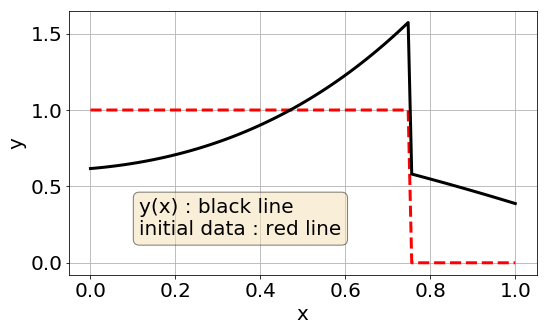

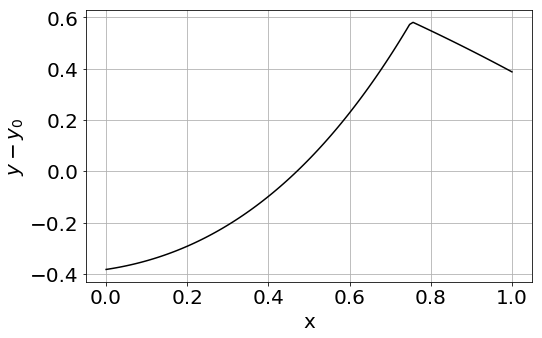

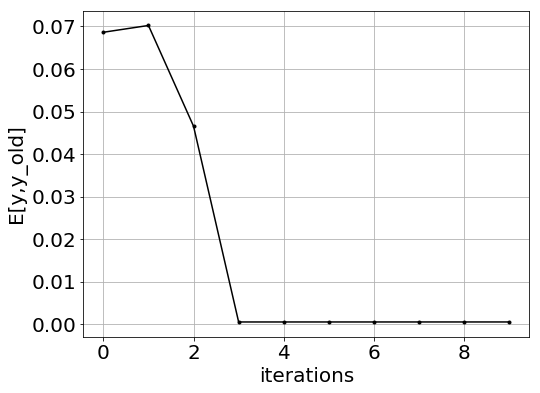

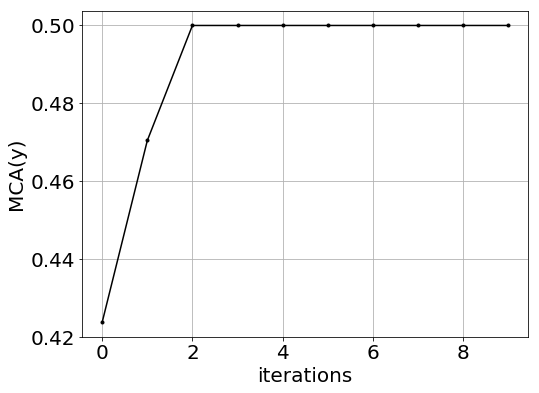

np.sum(y-y0) = 9.755816016276086


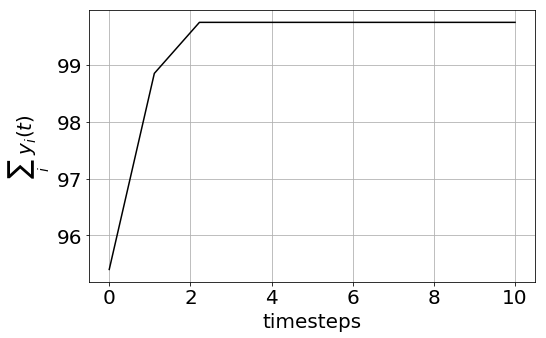

In [37]:
# Plot results
plt.rcParams.update({'font.size': 20})

fig, (ax1) = plt.subplots(1,1)
fig.set_size_inches(8, 5)

ax1.plot(np.linspace(0,1,numpoints),y0,'r--',linewidth=3)
ax1.plot(np.linspace(0,1,numpoints),y, 'k',linewidth=3)
# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
textstr = '\n'.join((
    r'y(x) : black line',
    r'initial data : red line'))
# place a text box in upper left in axes coords
ax1.text(0.15, 0.29, textstr, transform=ax1.transAxes, fontsize=20,
        verticalalignment='top', bbox=props)
ax1.set_xlabel("x")
ax1.set_ylabel("y")
#ax1.set_ylim(bottom=-0.005)
ax1.grid(True)

#ax2.plot(range(k),convergence[0:k],'k.-',linewidth=3)
#ax2.set_xlabel("iterations")
#ax2.set_ylabel("| y - y_prev |")
#ax2.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize = (8,5))
plt.plot(np.linspace(0,1,numpoints),y-y0 ,'k')
plt.xlabel("x")
plt.ylabel(r'$y-y_0$')
plt.grid()
plt.show()

k=len(e_history)
plt.figure(figsize = (8,6))
plt.plot(range(k),e_history ,'k.-')
plt.xlabel("iterations")
plt.ylabel("E[y,y_old]")
plt.grid()
plt.show()

k=len(mca_history)
plt.figure(figsize = (8,6))
plt.plot(range(k),mca_history ,'k.-')
plt.xlabel("iterations")
plt.ylabel("MCA(y)")
plt.grid()
plt.show()

print('np.sum(y-y0) =',np.sum(y-y0))

k=len(convergence)
plt.figure(figsize = (8,5))
plt.plot(np.linspace(0,k,k), convergence ,'k')
plt.xlabel("timesteps")
plt.ylabel(r'$\sum_i\ y_i(t)$')
plt.grid()
plt.show()

## Backward problem
The following code finds the solution to the backward-time problem $dy/dt=-Ly$ with $y=(1,1,...,1)$. 
The corresponding problem (in forward time) is an initial value problem that at some point reaches the equilibrium stratey $(1,1,...,1).$

In [11]:
y1 = np.ones(numpoints)
y = y1[:]

runTrue = True
k=0

while runTrue and k<35:
    df = np.matmul(L,y)
    y_prev = y
    #df_prev = np.matmul(K,y_prev)
    thiseps = 10
    for i in range(numpoints):
        if df[i] != 0.0:
            thiseps = -y[i]/df[i]
            #print(thiseps)
        if thiseps < eps and thiseps>=0 and y[i]>0.0:
            eps = thiseps*0.99
            print('eps update: ',eps)
    for i in range(numpoints):
        if df[i]<0.0 and y[i]<=0.0:
            runTrue = False
    # Newton forward integration
    y = y - eps * df                     # Backward problem
    if eps < 1e-10:
        runTrue = False
    k = k+1

print(k)

23


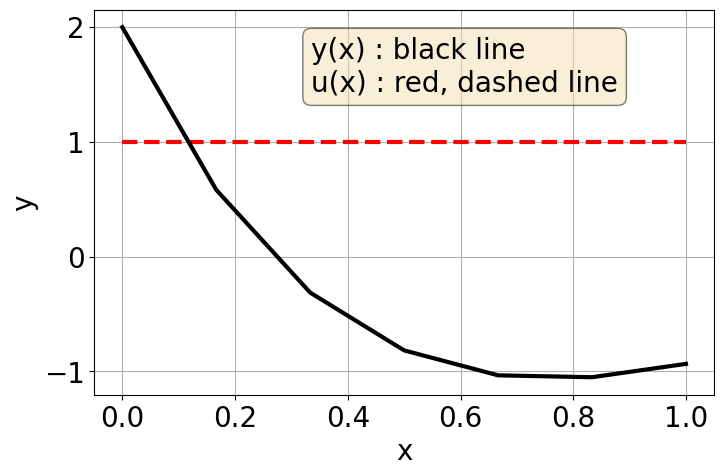

In [12]:
plt.rcParams.update({'font.size': 20})

fig, (ax1) = plt.subplots(1,1)
fig.set_size_inches(8, 5)

ax1.plot(np.linspace(0,1,numpoints),y1,'r--',linewidth=3)
ax1.plot(np.linspace(0,1,numpoints),y, 'k',linewidth=3)
# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
textstr = '\n'.join((
    r'y(x) : black line',
    r'u(x) : red, dashed line'))
# place a text box in upper left in axes coords
ax1.text(0.35, 0.93, textstr, transform=ax1.transAxes, fontsize=20,
        verticalalignment='top', bbox=props)
#ax1.set_ylim(bottom=0.0)
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.grid(True)

## Matrix calculations

The following is a numerical proof that whenever N is odd there is a Jordan chain of vectors

$$ (1, 1, 1, 1, ..., 1, 1) $$

$$ (1, 0, 1, 0, ..., 1, 0) $$

associated with the eigenvalue zero.

In [5]:
# This should output [1. 1. 1. ...  1.] if N is odd
y_p = []
for i in range(numpoints):
    if i%2 == 0:
        y_p.append(2)
    else:
        y_p.append(0)

print('y_p =',y_p)
print('K*y_p =',np.matmul(K,y_p))

y_p = [2, 0, 2, 0, 2, 0, 2, 0]
K*y_p = [1. 1. 1. 1. 1. 1. 1. 1.]


Next, we verify that there is a Jordan chain element ending at the linear combination of eigenvectors $-v_1-\frac{1}{2}a_2 v_2$ for the case $N=5$. The equation is $a_1 v_1+a_2 v_2 = Kv$ for $$v=(-1,1,0,0,1).$$

In [6]:
# This solves K*yp = -v1 - 2*v2, where v1 and v2 are eigenvectors v1=[1,0,1,0,1], v2=[0,1,0,1,0]
y_p = [-1,1,0,0,1]

print('y_p =',y_p)
print(Kmatrix(5,0.5))
print('K*y_p =',np.matmul(Kmatrix(5,0.5),y_p))

y_p = [-1, 1, 0, 0, 1]
[[ 0.4  0.   0.2  0.  -0.6]
 [ 1.2  0.5 -0.4 -0.5 -0.8]
 [ 1.   1.   0.  -1.  -1. ]
 [ 0.8  0.5  0.4 -0.5 -1.2]
 [ 0.6  0.  -0.2  0.  -0.4]]
K*y_p = [-1.  -1.5 -1.  -1.5 -1. ]


Verify that if $a$ is a vector with non-zero eigenvalue then $$ \sum_{i=0}^M x_i a_i =0. $$

In [8]:
K = Kmatrix(numpoints,C)
U,V = np.linalg.eig(K)

w = []
for i in range(numpoints):
    w.append(i-N/2)

print("\nNumerical error on the order of 1e-9\n")
print("sum( i*v ) =")

for k in range(len(V[0])):
    print(np.matmul(w,V[:,k]))


Numerical error on the order of 1e-9

sum( i*v ) =
(-3.3306690738754696e-16-4.440892098500626e-16j)
(-3.3306690738754696e-16+4.440892098500626e-16j)
(1.1102230246251565e-15+1.887379141862766e-15j)
(1.1102230246251565e-15-1.887379141862766e-15j)
(9.172566417525729e-08+0j)
(9.172566572956953e-08+0j)
(-3.774758283725532e-15-3.1086244689504383e-15j)
(-3.774758283725532e-15+3.1086244689504383e-15j)


## Jordan blocks
Here, we verify the computations of the Jordan decompositions for matrix sizes $4\times 4$ and $5\times 5.$

In [10]:
K = Kmatrix(4,0.5)

print('K=(1-P)L=')
print(K)

Q = [[1, 2, 2/3, -np.sqrt(5)/3],
     [1, 0,-1/3, 2*np.sqrt(5)/3],
     [1, 2, -4/3, -np.sqrt(5)/3],
     [1, 0,   1, 0]]

Qinv = [[-1/2, 0, 1/2,  1],
        [3/4, 1/4, -1/4, -3/4],
        [1/2, 0, -1/2, 0],
        [-1/np.sqrt(5), -3*0.5/np.sqrt(5), 1/np.sqrt(5),3*0.5/np.sqrt(5)]]


print('Qinv=')
print(Qinv)
print('numerical Qinv =')
print(np.linalg.inv(Q))

print("Qinv*Q =",np.matmul(Qinv,Q))


J= np.matmul( Qinv,3*np.matmul(K,Q) )

print('J=')
print(J)

print("\nExample: y=[0,1,1,0]")
yhere = [0,1,1,0]
print("Q^{-1}y =", np.matmul(Qinv,yhere))

print("A^2 = ")
print(np.matmul(K,K))
print("[[0,1/90,0,1/90],\n [-1/90,-2/90,1/90,2/90]]=")
print([[0,1/90,0,1/90],[-1/90,-2/90,1/90,2/90]])


K=(1-P)L=
[[ 0.45  0.05  0.05 -0.55]
 [ 1.15  0.35 -0.65 -0.85]
 [ 0.85  0.65 -0.35 -1.15]
 [ 0.55 -0.05 -0.05 -0.45]]
Qinv=
[[-0.5, 0, 0.5, 1], [0.75, 0.25, -0.25, -0.75], [0.5, 0, -0.5, 0], [-0.4472135954999579, -0.6708203932499369, 0.4472135954999579, 0.6708203932499369]]
numerical Qinv =
[[-5.00000000e-01  1.66533454e-16  5.00000000e-01  1.00000000e+00]
 [ 7.50000000e-01  2.50000000e-01 -2.50000000e-01 -7.50000000e-01]
 [ 5.00000000e-01 -0.00000000e+00 -5.00000000e-01 -0.00000000e+00]
 [ 4.47213595e-01  6.70820393e-01 -4.47213595e-01 -6.70820393e-01]]
Qinv*Q = [[ 1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  1.00000000e+00  0.00000000e+00 -2.77555756e-17]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00]
 [-1.11022302e-16  0.00000000e+00  1.11022302e-16 -1.00000000e+00]]
J=
[[ 2.49800181e-15  3.00000000e+00 -1.11022302e-15  4.44089210e-16]
 [-2.12330153e-15 -2.66453526e-15  8.46545056e-16 -2.22044605e-16]
 [-1.33226763e-15 -1.55

In [11]:
numpoints = 5

L = np.ones((numpoints,numpoints))
for i in range(numpoints):
    L[i,i]    = 0.0
    L[i,i+1:] = -1.0

P = ProjectionMatrix(numpoints,C) 
K = L - np.matmul(P,L) 

print('K =')
print(K)

Q = [[0, -1,    -1,  1/4, -np.sqrt(15)/4],
     [1, -1.5,   1,  3/4,  np.sqrt(15)/4],
     [0, -1,     0, -5/4,  np.sqrt(15)/4],
     [1, -1.5,   0, -3/4, -np.sqrt(15)/4],
     [0, -1,     1,    1,  0]]


Qinv = [[ -15,    60,  -45,   30,   -75],
        [  -30,    0,  -30,    0,   -30],
        [  -60,  -30,    0,   30,    60],
        [   30,   30,  -30,  -30,     0],
        [2*np.sqrt(15), 10*np.sqrt(15), 6*np.sqrt(15), -10*np.sqrt(15), -8*np.sqrt(15)]]

Qinv = np.array(Qinv)*(1/90)

I = np.matmul(Qinv,Q)
print('Qinv*Q =')
print(I)

J= np.matmul(Qinv,np.matmul(K,Q))
print('J =')
print(J)

print('Q=')
print(Q)
print('Qinv =')
print(Qinv)
print('numerical Qinv =')
print(np.linalg.inv(Q))

yhere = [[-1],[1],[0],[0],[1]]
print('Chain element Kv:')
print(np.matmul(K,yhere))

K =
[[ 0.4  0.   0.2  0.  -0.6]
 [ 1.2  0.5 -0.4 -0.5 -0.8]
 [ 1.   1.   0.  -1.  -1. ]
 [ 0.8  0.5  0.4 -0.5 -1.2]
 [ 0.6  0.  -0.2  0.  -0.4]]
Qinv*Q =
[[ 1.00000000e+00  1.11022302e-16  1.11022302e-16 -1.11022302e-16
   0.00000000e+00]
 [ 0.00000000e+00  1.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00]
 [ 0.00000000e+00 -1.11022302e-16  0.00000000e+00  5.55111512e-17
   1.00000000e+00]]
J =
[[ 0.00000000e+00 -2.49800181e-16  0.00000000e+00 -1.38777878e-16
   2.22044605e-16]
 [ 0.00000000e+00  1.85037171e-17  1.00000000e+00  0.00000000e+00
   5.55111512e-17]
 [ 0.00000000e+00  4.44089210e-16 -2.22044605e-16  2.22044605e-16
  -4.44089210e-16]
 [ 0.00000000e+00 -1.48029737e-16  1.11022302e-16 -5.55111512e-17
  -7.74596669e-01]
 [ 0.00000000e+00 -1.71995011e-16 -1.11022302e-16  7.74596669e-01
   2.77555

In [ ]:
def 

Points:  [0.         0.16666667 0.33333333 0.5        0.66666667 0.83333333
 1.        ]
Samples:  [0.18333333 0.12839506 0.05493827 0.         0.00061728 0.09382716
 0.31666667]


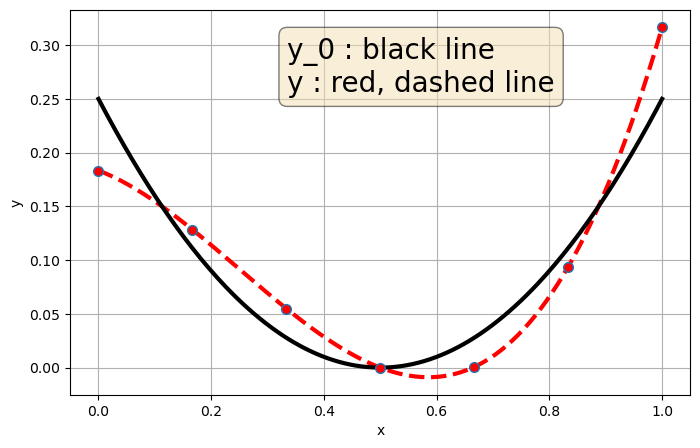

In [30]:
def ys(xs):
    return (xs-0.5)**2 + 2*( (2/3)*(xs-0.5)**3 - 0.1*(xs-0.5) )

xs = np.linspace(0,1,200)
samples = np.linspace(0,1,7)

fig, (ax1) = plt.subplots(1,1)
fig.set_size_inches(8, 5)

ax1.plot(xs,ys(xs),'r--',linewidth=3)
ax1.plot(xs,(xs-0.5)**2, 'k',linewidth=3)
ax1.plot(samples,ys(samples),'o', markersize=7, linewidth=3, markerfacecolor='red')
# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
textstr = '\n'.join((
    r'y_0 : black line',
    r'y : red, dashed line'))
# place a text box in upper left in axes coords
ax1.text(0.35, 0.93, textstr, transform=ax1.transAxes, fontsize=20,
        verticalalignment='top', bbox=props)
#ax1.set_ylim(bottom=0.0)
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.grid(True)

print("Points: ",samples)
print("Samples: ", ys(samples))